# Visualización de Información en Python

> **Autor** \
> Eduardo Graells-Garrido \
> Instituto de Data Science UDD \
> Telefónica I+D Chile \
> egraells@udd.cl \
> [@carnby](https://twitter.com/carnby)

## Sesión 1: Introducción a `Pandas`, `Matplotlib`, `Seaborn`

> **Caso de Estudio** \
> Data Set: Encuesta de Viajes (Origen-Destino) de Santiago, 2012 \
> Diplomado en Data Science UDD

## Introducción

La Encuesta Origen-Destino de Santiago, efectuada por última vez el año 2012, es el instrumento principal que utilizan las autoridades para tomar decisiones respecto a transporte en la ciudad. Consistió en entrevistar a los residentes de más de 18000 hogares haciéndoles la siguiente pregunta:

![](http://img.emol.com/2012/06/29/encuesta-transportes_134630.jpg)

(imagen de [EMOL: Lanzan encuesta que mide cambios en formas de movilizarse en la RM en últimos 10 años](http://www.emol.com/noticias/nacional/2012/06/29/548217/lanzan-encuesta-que-mide-cambios-en-formas-de-movilizarse-en-la-rm-en-ultima-decada.html))

**¿Cuáles viajes hiciste ayer?**

Las personas encuestadas responden a través de un _diario de viaje_. En este diario incluyen todos los datos pertinentes de sus viajes: a qué hora lo iniciaron, a qué hora terminaron, los puntos de origen y destino (coordenadas), el propósito del viaje, el/los modo(s) de viaje utilizados, etc. También incluye información socio-demográfica de cada persona que responde.

La encuesta es representativa a nivel comunal. Esto quiere decir que podemos sacar conclusiones sobre como se moviliza la población de Providencia, pero no de un barrio específico de la comuna. Puede ser que exista información de ese barrio específico, pero no podemos sacar conclusiones extrapolables al barrio completo.

### Lo que Haremos 

En este ejercicio:

  1. Cargaremos datos de la encuesta, disponible en el [Portal de Datos del Gobierno](http://datos.gob.cl/dataset/31682), en un DataFrame de `pandas`. 
  2. Veremos cómo cruzar dos tablas dentro del data set: la tabla con datos de _Personas_ y la tabla con datos de _Viajes_. Pondremos énfasis en los tipos de variables, de acuerdo a la teoría vista en clases.
  3. Exploraremos algunas opciones de visualización de `pandas`, y también probaremos algunos métodos de la biblioteca `seaborn`.

### Preámbulo: Importación de Bibliotecas Necesarias

Usualmente se cargan todos los módulos y bibliotecas en el comienzo del notebook. Esto permite conocer rápidamente los requerimientos que tiene y también tener una idea de lo que se hará.

In [1]:
# pandas y seaborn trabajan sobre matplotlib, una biblioteca de bajo nivel.
# el submódulo pyplot contiene métodos que nos permitirán manipular los gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# la biblioteca de Machine Learning scikit-learn tiene herramientas que permitirán manipular datos.
from sklearn.preprocessing import normalize
# la biblioteca pathlib tiene herramientas para navegar tus archivos sin importar el sistema que tengas (Linux, MacOS, Windows, etc). 
# viene incluida en la biblioteca standard de python
from pathlib import Path
# incluimos un archivo "herramientas.py" con funciones que sirven de ayuda
from herramientas import arbol

# esto le indica a Jupyter que los gráficos generados se desplieguen dentro del notebook
%matplotlib inline

# esto configura la apariencia de los gráficos
sns.set(context='notebook', font='Fira Sans', style='white', palette='plasma')

También se indican variables de configuración que puedan ser relevantes.

Por ejemplo, la variable `path` indica la carpeta en la que tenemos la encuesta origen-destino.

In [2]:
path = Path('../EOD_STGO')

#### Archivos de la Encuesta

Veamos qué archivos incluye la encuesta. Éstos son los archivos principales, que contienen la información de los viajes, hogares, y personas:

(nota: estos comandos funcionan en Linux y Mac OS, pero no en Windows).

In [3]:
arbol(path)

+ ..\EOD_STGO
    + DistanciaViaje.csv
    + Edadpersonas.csv
    + Etapas.csv
    + Hogares.csv
    + personas.csv
    + Tablas_parametros
        + Actividad.csv
        + ActividadDestino.csv
        + ActividadEmpresa.csv
        + AdultoMayor.csv
        + Autopista.csv
        + CirculacionBicicleta.csv
        + CodigoTiempo.csv
        + Combustible.csv
        + Comuna.csv
        + Comunas.csv
        + ConoceSantiago.csv
        + Discapacidad.csv
        + Donde Estudia.csv
        + EdadVehiculo.csv
        + Estaciona.csv
        + EstacionaBicicleta.csv
        + EstacionMetro.csv
        + EstacionMetroCambio.csv
        + EstacionTren.csv
        + Estudios.csv
        + Formapago.csv
        + HorarioMetro.csv
        + IngresoImputado.csv
        + JornadaTrabajo.csv
        + LicenciaConducir.csv
        + MarcaVehiculo.csv
        + MediosUsados.csv
        + MedioViajeRestriccion.csv
        + Modo - copia.csv
        + Modo.csv
        + ModoAgregado.csv
        

Las primeras 5 lineas de `viajes.csv`

In [4]:
with open(path/'viajes.csv') as archivo:
    lineas = [next(archivo) for x in range(5)]
for linea in lineas:
    print(linea)

Hogar;Persona;Viaje;Etapas;ComunaOrigen;ComunaDestino;SectorOrigen;SectorDestino;ZonaOrigen;ZonaDestino;OrigenCoordX;OrigenCoordY;DestinoCoordX;DestinoCoordY;Proposito;PropositoAgregado;ActividadDestino;MediosUsados;ModoAgregado;ModoPriPub;ModoMotor;HoraIni;HoraFin;HoraMedia;TiempoViaje;TiempoMedio;Periodo;MinutosDespues;CuadrasDespues;FactorLaboralNormal;FactorSabadoNormal;FactorDomingoNormal;FactorLaboralEstival;FactorFindesemanaEstival;CodigoTiempo

173431;17343102;1734310202;1;94;94;2;2;400;407;335208,7188;6288387;338812,3125;6292391;7;3;;2;2;2;1;22:30;23:40;23:05;70;3;6;6;1;1,00000000;;;;;0

173441;17344101;1734410101;2;94;71;2;3;407;307;338536,4375;6291928;354267,3438;6302297;1;1;5;"2;4";9;2;1;13:00;14:45;13:53;105;4;5;5;1;1,12721985;;;;;0

173441;17344101;1734410102;2;71;94;3;2;307;407;354267,3438;6302297;338536,4375;6291928;7;1;;"4;2";9;2;1;22:00;23:30;22:45;90;3;5;10;2;1,12721985;;;;;0

173441;17344103;1734410301;2;94;91;2;3;407;437;338536,4375;6291928;350841,6563;6297212;1;1;

Observamos que en el archivo `viajes.csv` cada viaje es una fila, y cada campo está compuesto por números. Estos números no siempre son el dato final, por ejemplo, las comunas de origen y destino tienen un número y no sus nombres. La manera de decodificar esos números es leer los archivos que están en la carpeta `Tablas_parametros`:

In [5]:
arbol(path/"Tablas_parametros")

+ ..\EOD_STGO\Tablas_parametros
    + Actividad.csv
    + ActividadDestino.csv
    + ActividadEmpresa.csv
    + AdultoMayor.csv
    + Autopista.csv
    + CirculacionBicicleta.csv
    + CodigoTiempo.csv
    + Combustible.csv
    + Comuna.csv
    + Comunas.csv
    + ConoceSantiago.csv
    + Discapacidad.csv
    + Donde Estudia.csv
    + EdadVehiculo.csv
    + Estaciona.csv
    + EstacionaBicicleta.csv
    + EstacionMetro.csv
    + EstacionMetroCambio.csv
    + EstacionTren.csv
    + Estudios.csv
    + Formapago.csv
    + HorarioMetro.csv
    + IngresoImputado.csv
    + JornadaTrabajo.csv
    + LicenciaConducir.csv
    + MarcaVehiculo.csv
    + MediosUsados.csv
    + MedioViajeRestriccion.csv
    + Modo - copia.csv
    + Modo.csv
    + ModoAgregado.csv
    + ModoDifusion.csv
    + ModoestacionaBicicleta.csv
    + ModoMotor.csv
    + ModoPriPub.csv
    + NoUsaAutopista.csv
    + NoUsaTransantiago.csv
    + NoViaja.csv
    + Ocupacion.csv
    + PaseEscolar.csv
    + Periodo.csv
    + Propie

In [6]:
# !head {path}/Tablas_parametros/Comuna.csv
with open(path/'Tablas_parametros'/'Comuna.csv', encoding = 'utf-8') as archivo:
    lineas = [next(archivo) for x in range(5)]
for linea in lineas:
    print(linea)

Id,Comuna

10,CALAMA

13,COPIAPÓ

19,LA SERENA

21,COQUIMBO



Como vemos, el archivo `Comuna.csv` contiene la conversión de los números en las columnas `ComunaOrigen` y `ComunaDestino` de `viajes.csv`. Si en los viajes dice `ComunaOrigen: 35`, entonces el viaje se originó Quintero.

## Carga de Datos

### Personas

Comencemos a leer los datos de la encuesta. Para eso utilizaremos el método llamado `read_csv` que tiene `pandas`. Este método genera un `DataFrame` a partir de un archivo de texto como los que vienen en la encuesta. Noten que debemos ayudar a `pandas` a entender la estructura del archivo: 

  * cuál es el carácter que separa los campos (en este caso, `;`).
  * cuál es el carácter que separa decimales (en este caso, `,`).
  * cuál es la codificación de texto del archivo (`utf-8`, pero, si sus archivos son generados en Windows, usualmente es `iso-8859-1`).
  * cuál es la columna que utilizaremos como índice (`Persona`).

In [7]:
personas = pd.read_csv(path / 'personas.csv', sep=';', decimal=',', index_col=['Persona'], encoding='utf-8')

El método `head` nos muestra la cabecera de una tabla. Es bueno para ver que se ha cargado bien y que tiene la estructura que esperamos.

In [8]:
personas.head()

,Hogar,AnoNac,Sexo,Relacion,Viajes,LicenciaConducir,PaseEscolar,AdultoMayor,Estudios,Curso,...,TramoIngreso,IngresoFinal,TramoIngresoFinal,IngresoImputado,Factor_LaboralNormal,Factor_SabadoNormal,Factor_DomingoNormal,Factor_LaboralEstival,Factor_FindesemanaEstival,Factor
Persona,,,,,,,,,,,,,,,,,,,,,
10001001,100010,1958,1,1,2,3,2,2,4.0,8.0,...,2,240000,2,0,NaN,NaN,1668.2600,NaN,NaN,82.58553
10001002,100010,1956,2,2,5,1,2,2,5.0,1.0,...,0,0,0,0,NaN,NaN,852.1137,NaN,NaN,99.53422
10001003,100010,1982,2,3,0,1,2,2,7.0,4.0,...,2,210845,2,2,NaN,NaN,1609.1630,NaN,NaN,151.59367
10002001,100020,1954,1,1,4,3,2,2,4.0,8.0,...,1,133000,1,0,169.50230,NaN,NaN,NaN,NaN,45.21325
10002002,100020,1961,2,2,2,1,2,2,4.0,8.0,...,1,193000,1,0,43.26765,NaN,NaN,NaN,NaN,25.62248


El atributo `columns` contiene los nombres de las columnas y el orden en el que aparecen:

In [9]:
personas.columns

Index(['Hogar', 'AnoNac', 'Sexo', 'Relacion', 'Viajes', 'LicenciaConducir',
       'PaseEscolar', 'AdultoMayor', 'Estudios', 'Curso', 'Actividad',
       'Ocupacion', 'ActividadEmpresa', 'JornadaTrabajo', 'DondeEstudia',
       'DirActividadCoordX', 'DirActividadCoordY', 'DirEstudiosCoordX',
       'DirEstudiosCoordY', 'NoViaja', 'TarjetaBip', 'Tarjeta2Bip',
       'MedioViajeRestricion', 'ConoceTransantiago', 'NoUsaTransantiago',
       'Discapacidad', 'TieneIngresos', 'Ingreso', 'TramoIngreso',
       'IngresoFinal', 'TramoIngresoFinal', 'IngresoImputado',
       'Factor_LaboralNormal', 'Factor_SabadoNormal', 'Factor_DomingoNormal',
       'Factor_LaboralEstival', 'Factor_FindesemanaEstival', 'Factor'],
      dtype='object')

El método `info` nos permite saber los tipos de dato que infirió `pandas` para cada columna:

In [10]:
personas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60054 entries, 10001001 to 74382301
Data columns (total 38 columns):
Hogar                        60054 non-null int64
AnoNac                       60054 non-null int64
Sexo                         60054 non-null int64
Relacion                     60054 non-null int64
Viajes                       60054 non-null int64
LicenciaConducir             60054 non-null object
PaseEscolar                  60054 non-null int64
AdultoMayor                  60054 non-null int64
Estudios                     59932 non-null float64
Curso                        59932 non-null float64
Actividad                    57969 non-null object
Ocupacion                    25586 non-null float64
ActividadEmpresa             25586 non-null float64
JornadaTrabajo               25586 non-null float64
DondeEstudia                 15643 non-null float64
DirActividadCoordX           22706 non-null float64
DirActividadCoordY           22706 non-null float64
DirEstudiosCo

Podemos ver los valores específicos de una columna, y también aplicar el método `head`. Usaremos también el método `describe`, que muestra estadísticas básicas sobre la columna.

Fijémonos en dos variables: `AnoNac`(año de nacimiento) y `Sexo`.

Partamos con el año de nacimiento:

In [11]:
personas['AnoNac'].head()

Persona
10001001    1958
10001002    1956
10001003    1982
10002001    1954
10002002    1961
Name: AnoNac, dtype: int64

Podemos utilizar el método `describe` que calcula estadística descriptiva simple:

In [12]:
personas['AnoNac'].describe()

count    60054.000000
mean      1975.421920
std         22.189995
min       1904.000000
25%       1959.000000
50%       1977.000000
75%       1994.000000
max       2013.000000
Name: AnoNac, dtype: float64

#### Visualización con Pandas: el método `plot`

Podemos hacer un histograma, un gráfico de barras donde cada una de ellas codifica la cantidad de muestras en un rango específico. Lo hacemos con el método `plot` y su parámetro `kind` (tipo):

findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.


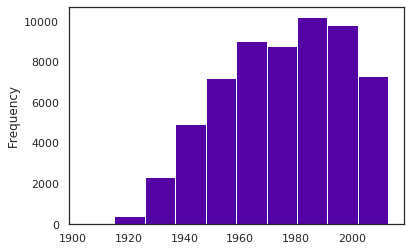

In [13]:
personas['AnoNac'].plot(kind='hist')

Que bonito, pero son muy pocos `bins` (barras con inicio y fin en el eje x, utilizadas para contar los datos). 

Cuando hacemos histogramas debemos tener cuidado con el número de bins porque si son pocos podemos estar distorsionando la forma de la distribución.

Podemos utilizar el parámetro `bins` del método para configurar esto:

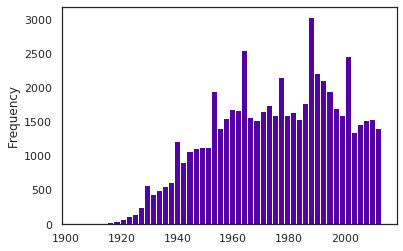

In [14]:
personas['AnoNac'].plot(kind='hist', bins=50)

Elegir la cantidad (o el tamaño) de los bins de un histograma es un problema en sí mismo.

Una manera de resolverlo automáticamente es no utilizar bins, reemplazándo el histograma por una distribución de densidades. Es el método llamado [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation). Se utiliza así:

(1900, 2015)

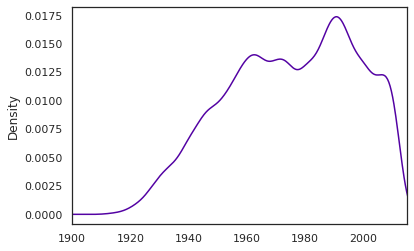

In [15]:
personas['AnoNac'].plot(kind='kde')
plt.xlim([1900, 2015])

La KDE permite tener una distribución continua. Es un método que también tiene supuestos y parámetros que influyen cómo calcula la distribución de densidad, pero eso es tema para una clase de Machine Learning.

#### Variables Categóricas

Ahora bien, la columna de nacimiento era cuantitativa. Tiene sentido calcular estadística descriptiva. ¿Qué pasa con una columna categórica?

In [16]:
personas['Sexo'].head()

Persona
10001001    1
10001002    2
10001003    2
10002001    1
10002002    2
Name: Sexo, dtype: int64

Como vemos, `Sexo` tiene valores 1 y 2. Son números enteros.

Al tener números, es posible calcular la estadística descriptiva. Sin embargo, no tiene sentido hacerlo:

In [17]:
personas['Sexo'].describe()

count    60054.000000
mean         1.527509
std          0.499247
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Sexo, dtype: float64

¿Qué significa que `Sexo` tenga valor promedio 1.52? Nada. 

Algo más útil es calcular las frecuencias de cada valor disponible en la columna. Lo podemos hacer con el método `value_counts`:

In [18]:
personas['Sexo'].value_counts()

2    31679
1    28375
Name: Sexo, dtype: int64

Podemos usar el método `plot` de pandas para graficar estos resultados:

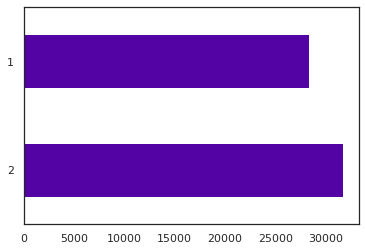

In [19]:
personas['Sexo'].value_counts().plot(kind='barh')

Ya hemos usado dos tipos de gráficos, expresados en el parámetro `kind`. Éstos son los tipos de gráfico que permite `pandas`:

```
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot
```

`Sexo` es una variable categórica que está codifica en el data set. 

Decodifiquemos los números de acuerdo a lo que dicen los archivos en las tablas de parámetros:

In [20]:
# !head {path}/Tablas_parametros/Sexo.csv
with open(path/'Tablas_parametros'/'Sexo.csv', encoding = 'utf-8') as archivo_sexo:
    lineas = [next(archivo_sexo) for x in range(3)]
for linea in lineas:
    print(linea)

Id;Sexo

1;Hombre

2;Mujer



Podemos escribir una función que implemente esta asignación, y aplicarla a la columna a través del método `map`. Lo que hace `map` es ejecutar la función con cada fila de la columna como parámetro, y entregar el resultado como una columna nueva:

In [21]:
def decode_sex(number):
    if number == 1:
        return 'Hombre'
    elif number == 2:
        return 'Mujer'
    else:
        raise ValueError('Valor Inválido')

personas['Sexo'].head().map(decode_sex)

Persona
10001001    Hombre
10001002     Mujer
10001003     Mujer
10002001    Hombre
10002002     Mujer
Name: Sexo, dtype: object

***
Una nota por [@tacosdedatos](https://twitter.com/tacosdedatos):
Esto de usar `map` se puede hacer también con un _diccionario_ de `python` lo cual a veces es más facil de entender.
```python
decodifica_sexo = {1: 'Hombre', 2: 'Mujer'}
pesonas['Sexo'].head().map(decodifica_sexo)
```
Esto es más rápido (solo lo notarías si tienes millones de observaciones en tus datos) y te evitas el activar un `error`, las observaciones que no tengas `1` o `2` seran `NaN` las cuales puedes rellenar despues con el metodo `.fillna()` de `pandas`. 
***

Ahora bien, hay categorías que son más grandes que `Sexo`, y perderíamos tiempo escribiendo una función para cada caso. Podemos hacer una que funcione en general:

In [22]:
import numpy as np

def decode_column(df, fname, col_name, index_col='Id', value_col=None, sep=';', encoding='utf-8'):
    '''
    param :df: DataFrame del que leeremos una columna.
    param :fname: nombre del archivo que contiene los valores a decodificar.
    param :col_name: nombre de la columna que queremos decodificar.
    param :index_col: nombre de la columna en el archivo @fname que tiene los índices que codifican @col_name
    param :value_col: nombre de la columna en el archivo @fname que tiene los valores decodificados
    param :sep: carácter que separa los valores en @fname. 
    param :encoding: identificación del _character set_ que utiliza el archivo. Usualmente es utf-8, si no funciona,
                     se puede probar con iso-8859-1.
    '''
    if value_col is None:
        value_col = 'value'
        
    values_df = pd.read_csv(fname, sep=sep, index_col=index_col, names=[index_col, value_col], header=0,
                            dtype={index_col: np.float64}, encoding=encoding)
    
    src_df = df.loc[:,(col_name,)]
    
    return src_df.join(values_df, on=col_name)[value_col]

In [23]:
decode_column(personas.head(), path /'Tablas_parametros/Sexo.csv', 'Sexo')

Persona
10001001    Hombre
10001002     Mujer
10001003     Mujer
10002001    Hombre
10002002     Mujer
Name: value, dtype: object

Funciona :)

Lo que haremos ahora es guardar el resultado de decodificar la columna. Lo haremos asignando el resultado de la siguiente manera:

```python
dataframe[NOMBRE_NUEVA_COLUMNA] = decode_column(...)
```

En este caso utilizaremos el mismo nombre de la columna que estamos decodificando como nombre de columna final. Así, perdemos los datos anteriores (en este caso, `Sexo` codificado con números) pero eso no es problema porque no los necesitamos.

Hagámoslo ;)

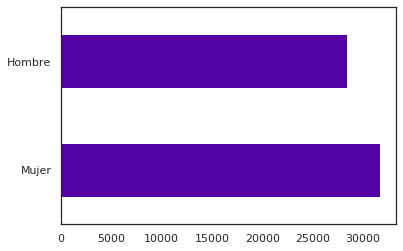

In [24]:
personas['Sexo'] = decode_column(personas, path / 'Tablas_parametros/Sexo.csv', 'Sexo')
personas.Sexo.value_counts().plot(kind='barh')

***
Note por [@tacosdedatos](https://twitter.com/tacosdedatos):

Notarán que accedimos la columna `Sexo` de dos maneras:
```python
personas['Sexo']
```
y 
```python
personas.Sexo
```

ambas son validas en `pandas` pero no es recomendable utilizar el `dot accessor` ósea utilizar `.` para acceder los valores de una columna. 

El resto del tutorial originalmente utilizaba ambas maneras de acceso pero lo cambié a el `bracket notation` ósea utilizar `[]` para acceder los valores de la columna. 
***

¡Funciona! Probemos con otras columnas de la tabla:

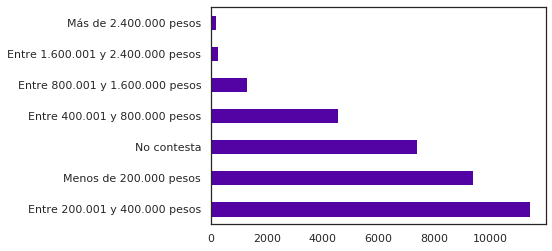

In [25]:
personas['TramoIngreso'] = decode_column(personas, path / 'Tablas_parametros/TramoIngreso.csv', 'TramoIngreso')
personas['TramoIngreso'].value_counts().plot(kind='barh')

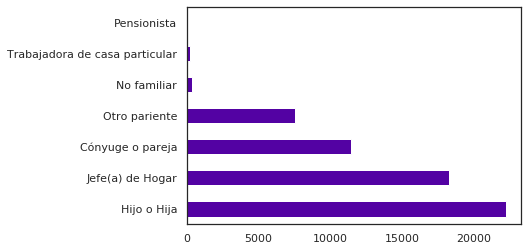

In [26]:
personas['Relacion'] = decode_column(personas,path / 'Tablas_parametros/Relacion.csv', 'Relacion', value_col='relacion')
personas['Relacion'].value_counts().plot(kind='barh')

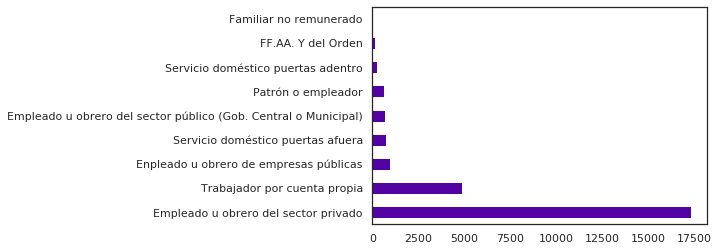

In [27]:
personas['Ocupacion'] = decode_column(personas,path / 'Tablas_parametros/Ocupacion.csv', 'Ocupacion', value_col='ocupacion')
personas['Ocupacion'].value_counts().plot(kind='barh')

¡El método `value_counts` es muy útil! Nos permitió contar los valores que tienen las categorías.

Sin embargo, a veces queremos ir un poco más allá, y explorar las relaciones _entre_ categorías.

### `seaborn`: Visualización Estadística

Antes contábamos valores utilizando `value_counts()` y luego graficáamos utilizando `plot(kind='barh')`.

La biblioteca `seaborn` tiene un método que permite hacer eso. Se llama `sns.countplot`:

***
Nota por [@tacosdedatos](https://twitter.com/tacosdedatos): Si quieres evitarte el `<matplotlib.axes._subplots.AxesSubplot at 0x7fa2d0674400>` antes de tus visualizaciones de `matplotlib` o `seaborn` agrega un `;` al final de tu código.
***

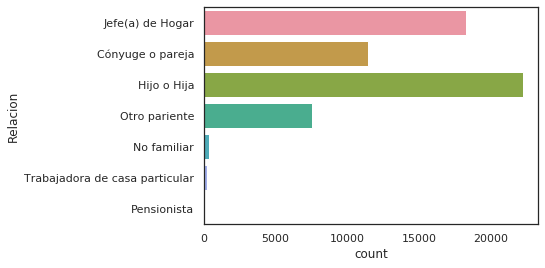

In [28]:
sns.countplot(y='Relacion', data=personas);

Aunque el resultado es similar al del método anterior, hay diferencias:

  - No se ordena de manera automática las barras. Esto puede ser útil o no.
  - Las barras tienen colores. Estéticamente puede ser agradable, pero por otro lado utiliza un canal visual adicional (color) sin aportar información.
  
El segundo punto implica que sí podríamos utilizar el color como un canal relevante. De hecho, en ese tipo de codificación aprovecharemos el potencial de `seaborn`, por ejemplo, para desagregar los gráficos por varias variables.

Probemos viendo la cantidad de personas en cada categoría de `Relacion` desagregando por `Sexo`:

findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.


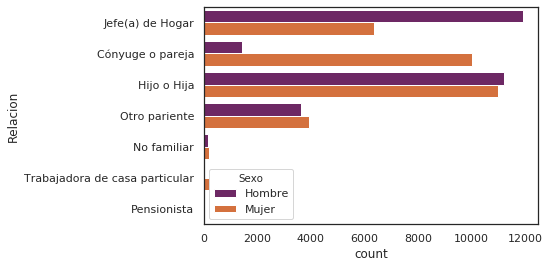

In [29]:
sns.countplot(y='Relacion', data=personas, hue='Sexo', 
              palette='inferno');

Esto ya se ve más interesante, ¿no? Podemos empezar a _preguntar_ cosas a los datos. Por ejemplo, al combinar las variables `Relacion` y `Sexo` notamos que los hombres suelen identificarse como jefes de hogar y las mujeres como cónyuge en proporciones distintas a las de otros roles dentro del hogar.

#### Variables Categóricas y Cuantitativas

A veces no solamente se quiere ver la cantidad de observaciones para una variable. También son de interés las diferencias en los promedios con sus respectivas varianzas. Es decir, ver la relación entre una variable categórica y una variable ordinar.

Probemos la relación entre una variable categórica (`Sexo`) y una cuantitativa (`Ingreso`). Como no todas las personas tienen ingreso, analizaremos las que tienen un valor válido en la columna `Ocupacion`.

Para ello podemos utilizar la función `sns.factorplot`:

C:\Users\sanchez\AppData\Local\Continuum\anaconda3\envs\NACIS2019\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


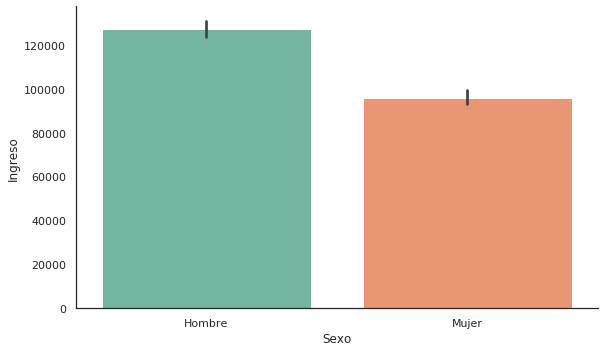

In [30]:
sns.factorplot(y='Ingreso', x='Sexo', data=personas[pd.notnull(personas.Ocupacion)], 
               aspect=1.7, palette='Set2', kind='bar');

Utilizando `seaborn` podemos explorar distintas maneras de ver estos datos. Por ejemplo, ¿varía el ingreso por tipo de ocupación? Probemos dos maneras de desagregar los resultados:

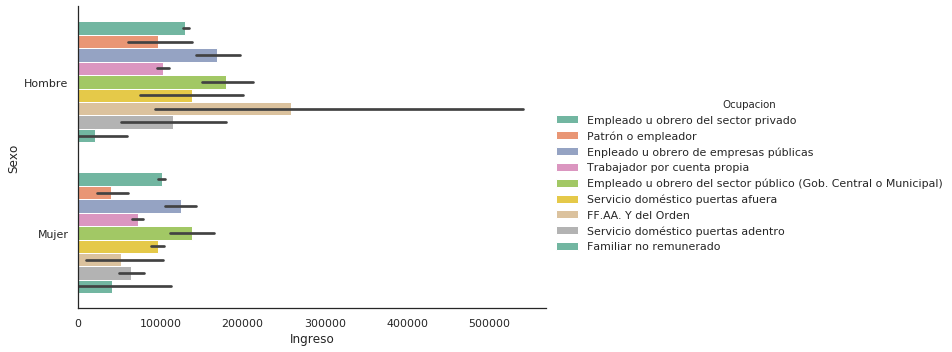

In [31]:
sns.factorplot(x='Ingreso', y='Sexo', hue='Ocupacion', 
               data=personas, aspect=1.7, palette='Set2', kind='bar');

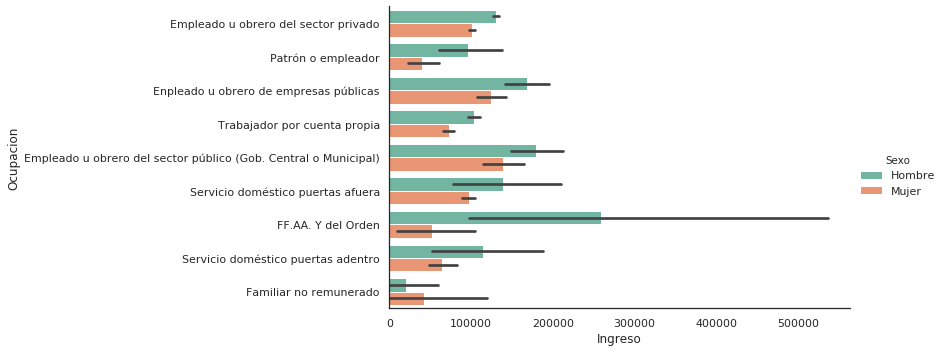

In [32]:
sns.factorplot(x='Ingreso', hue='Sexo', y='Ocupacion', 
               data=personas, aspect=2.5, palette='Set2', kind='bar');

¿Cuál les parece más efectivo?

#### Viajes

Ahora leamos la tabla de viajes. El proceso es análogo al de las personas.

In [33]:
viajes = pd.read_csv(path / 'viajes.csv', sep=';', decimal=',', index_col=['Viaje'])
viajes.head()

,Hogar,Persona,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,...,TiempoMedio,Periodo,MinutosDespues,CuadrasDespues,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo
Viaje,,,,,,,,,,,,,,,,,,,,,
1734310202,173431,17343102,1,94.0,94.0,2.0,2.0,400,407,335208.7188,...,3.0,6.0,6.0,1.0,1.000000,NaN,NaN,NaN,NaN,0.0
1734410101,173441,17344101,2,94.0,71.0,2.0,3.0,407,307,338536.4375,...,4.0,5.0,5.0,1.0,1.127220,NaN,NaN,NaN,NaN,0.0
1734410102,173441,17344101,2,71.0,94.0,3.0,2.0,307,407,354267.3438,...,3.0,5.0,10.0,2.0,1.127220,NaN,NaN,NaN,NaN,0.0
1734410301,173441,17344103,2,94.0,91.0,2.0,3.0,407,437,338536.4375,...,2.0,5.0,10.0,2.0,1.127220,NaN,NaN,NaN,NaN,0.0
1734410302,173441,17344103,2,91.0,94.0,3.0,2.0,437,407,350841.6563,...,5.0,4.0,10.0,2.0,1.052764,NaN,NaN,NaN,NaN,0.0


In [34]:
viajes.columns

Index(['Hogar', 'Persona', 'Etapas', 'ComunaOrigen', 'ComunaDestino',
       'SectorOrigen', 'SectorDestino', 'ZonaOrigen', 'ZonaDestino',
       'OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY',
       'Proposito', 'PropositoAgregado', 'ActividadDestino', 'MediosUsados',
       'ModoAgregado', 'ModoPriPub', 'ModoMotor', 'HoraIni', 'HoraFin',
       'HoraMedia', 'TiempoViaje', 'TiempoMedio', 'Periodo', 'MinutosDespues',
       'CuadrasDespues', 'FactorLaboralNormal', 'FactorSabadoNormal',
       'FactorDomingoNormal', 'FactorLaboralEstival',
       'FactorFindesemanaEstival', 'CodigoTiempo'],
      dtype='object')

In [35]:
viajes['ModoAgregado'] = decode_column(viajes, path / 'Tablas_parametros/ModoAgregado.csv', 'ModoAgregado', 
              index_col='ID', value_col='Modo')
viajes['ModoAgregado'].value_counts()

Caminata                  33827
Auto                      26437
Bus TS                    18830
Bus TS - Metro             8434
Otros                      5169
Metro                      5000
Bicicleta                  3870
Taxi Colectivo             3533
Bus no TS                  3316
Taxi                       1662
Otros - Bus TS              731
Bus no TS - Metro           694
Taxi Colectivo - Metro      643
Otros - Bus TS - Metro      492
Auto - Metro                322
Bus TS - Bus no TS          296
Otros - Metro               210
Taxi - Metro                125
Name: ModoAgregado, dtype: int64

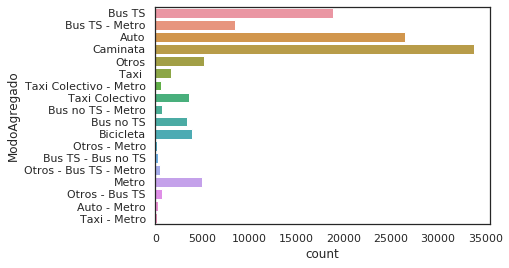

In [36]:
sns.countplot(y='ModoAgregado', data=viajes);

Comencemos a hacer preguntas. Por ejemplo:

#### ¿Usan las mujeres los mismos modos de transporte que los hombres?

Para responderla, necesitamos cruzar la tabla de viajes con la tabla de personas. Usaremos el método `merge` de `pandas`:

In [37]:
viajes_persona = viajes.merge(personas, left_on='Persona', right_on='Persona')

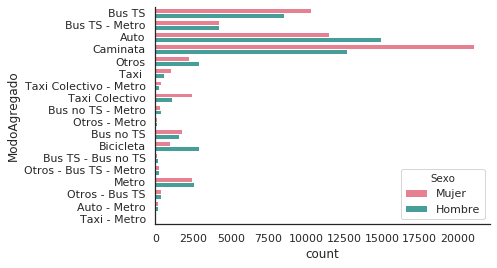

In [38]:
sns.countplot(y='ModoAgregado', hue='Sexo', 
              data=viajes_persona, palette='husl')
# con esto quitamos parte del marco
sns.despine();

Sin embargo, nos interesa más la proporción en cada modo de viaje. Tenemos que _normalizar_ los datos. Aquí hay una manera de hacerlo:

In [39]:
def normalize_dataframe(df):
    df = pd.DataFrame(normalize(df, norm='l1'), index=df.index, columns=df.columns)
    return df

modo_por_sexo = viajes_persona.groupby(['ModoAgregado', 'Sexo']).size().unstack()
modo_por_sexo = normalize_dataframe(modo_por_sexo)
modo_por_sexo

Sexo,Hombre,Mujer
ModoAgregado,,
Auto,0.566025,0.433975
Auto - Metro,0.475155,0.524845
Bicicleta,0.746253,0.253747
Bus TS,0.453160,0.546840
Bus TS - Bus no TS,0.557432,0.442568
Bus TS - Metro,0.496562,0.503438
Bus no TS,0.464113,0.535887
Bus no TS - Metro,0.515850,0.484150
Caminata,0.375765,0.624235


Probaremos el método `plot` de `pandas` con el tipo `barh`, pero esta vez utilizamos un gráfico de barras apiladas. Para ello, podemos usar el parámetro `stacked=True`:

findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.


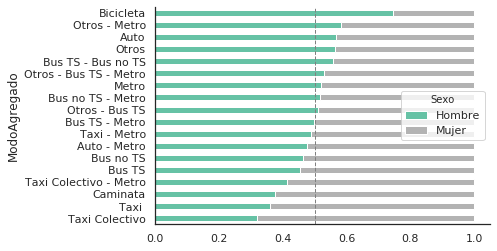

In [40]:
modo_por_sexo.sort_values('Hombre').plot(kind='barh', stacked=True, cmap='Set2')
# para ayudarnos a diferenciar la tendencia de cada modo de transporte tracemos una línea vertical
plt.axvline(x=0.5, color='grey', linestyle='dashed', linewidth=1)
# este método era de seaborn, pero lo podemos usar igual aquí - ya que todo sucede en matplotlib
sns.despine()

¡Quizás los modos de transporte no son usados por igual por hombres y mujeres! Aquí hay material para indagar que puede ser interesante para el proyecto del curso.

Veamos ahora los viajes de acuerdo a donde se originan o donde terminan.

In [41]:
viajes_persona['SectorOrigen'] = decode_column(viajes_persona, path / 'Tablas_parametros/Sector.csv', 
                                       col_name='SectorOrigen', index_col='Sector', value_col='Nombre', sep=';')

In [42]:
viajes_persona['SectorDestino'] = decode_column(viajes_persona, path / 'Tablas_parametros/Sector.csv', 
                                       col_name='SectorDestino', index_col='Sector', value_col='Nombre', sep=';')

Digamos que solamente nos interesan los viajes _dentro_ de la ciudad. Para eso podemos filtrar los viajes cuyo sector sea externo o exterior:

In [43]:
viajes_persona['SectorOrigen'].value_counts()

Oriente                   21006
Poniente                  20496
Sur                       19815
Sur-Oriente               18250
Norte                     14859
Centro                    10276
Extensión Sur-Poniente     6646
Exterior a RM               242
Name: SectorOrigen, dtype: int64

In [44]:
viajes_persona['SectorDestino'].value_counts()

Oriente                   21036
Poniente                  20434
Sur                       19764
Sur-Oriente               18230
Norte                     14828
Centro                    10377
Extensión Sur-Poniente     6563
Exterior a RM               281
Name: SectorDestino, dtype: int64

El filtrado lo haremos así:

In [45]:
viajes_persona = viajes_persona[(viajes_persona['SectorOrigen'] != 'Exterior a RM') 
                & (viajes_persona['SectorDestino'] != 'Exterior a RM')
                & (viajes_persona['SectorOrigen'] != 'Extensión Sur-Poniente') 
                & (viajes_persona['SectorDestino'] != 'Extensión Sur-Poniente')
                & pd.notnull(viajes_persona['SectorOrigen'])
                & pd.notnull(viajes_persona['SectorDestino'])]

Ahora sigamos cargando variables :)

In [46]:
viajes_persona['Proposito'] = decode_column(viajes_persona, path / 'Tablas_parametros/Proposito.csv', col_name='Proposito')
viajes_persona['Proposito'].value_counts()

volver a casa                   46947
Al trabajo                      16214
De compras                      10181
Al estudio                       7627
Trámites                         3818
Buscar o Dejar a alguien         3696
Visitar a alguien                3286
Recreación                       2759
De salud                         2033
Otra actividad (especifique)     1683
Por trabajo                      1490
Por estudio                       890
Comer o Tomar algo                632
Buscar o dejar algo               465
Name: Proposito, dtype: int64

In [47]:
viajes_persona['ComunaOrigen'] = decode_column(viajes_persona, path / 'Tablas_parametros/Comunas.csv', 'ComunaOrigen', 
                                       value_col='Comuna', sep=',')
viajes_persona['ComunaOrigen'].value_counts()

Santiago               9992
Maipú                  7707
Puente Alto            7554
Las Condes             6348
La Florida             5520
Providencia            5311
San Bernardo           5192
Ñuñoa                  3850
Pudahuel               3443
Quilicura              3303
Peñalolén              2387
Recoleta               2326
La Pintana             2244
San Miguel             2151
El Bosque              2141
Estación Central       1971
Colina                 1835
Vitacura               1815
La Reina               1812
La Granja              1800
Macul                  1729
Renca                  1593
Pedro Aguirre Cerda    1586
Lo Barnechea           1517
Conchalí               1499
San Joaquín            1458
Independencia          1436
La Cisterna            1434
Huechuraba             1395
Cerro Navia            1327
Quinta Normal          1285
Cerrillos              1229
Lo Prado               1169
Lampa                  1159
San Ramón              1117
Lo Espejo           

In [48]:
viajes_persona['ComunaDestino'] = decode_column(viajes_persona, path / 'Tablas_parametros/Comunas.csv', 'ComunaDestino', 
                                       value_col='Comuna', sep=',')
viajes_persona['ComunaDestino'].value_counts()

Santiago               10081
Maipú                   7672
Puente Alto             7564
Las Condes              6317
La Florida              5508
Providencia             5374
San Bernardo            5212
Ñuñoa                   3853
Pudahuel                3443
Quilicura               3290
Peñalolén               2379
Recoleta                2325
La Pintana              2235
San Miguel              2149
El Bosque               2135
Estación Central        1997
Colina                  1839
La Reina                1811
Vitacura                1808
La Granja               1789
Macul                   1745
Renca                   1580
Pedro Aguirre Cerda     1563
Lo Barnechea            1515
Conchalí                1479
San Joaquín             1449
Independencia           1446
La Cisterna             1413
Huechuraba              1406
Cerro Navia             1325
Quinta Normal           1282
Cerrillos               1235
Lo Prado                1163
Lampa                   1152
San Ramón     

In [49]:
viajes_persona['ActividadDestino'] = decode_column(viajes_persona, path / 'Tablas_parametros/ActividadDestino.csv', 
                                           'ActividadDestino')
viajes_persona['ActividadDestino'].value_counts()

Servicios                                                       7849
Comercio                                                        3200
Industria                                                       2270
Otros                                                           1601
Educación                                                        820
Salud                                                            752
Habitacional (Ej. Servicio doméstico, enfermera a domicilio)     595
Sector público                                                   381
Name: ActividadDestino, dtype: int64

In [50]:
viajes_persona['Periodo'] = decode_column(viajes_persona, path / 'Tablas_parametros/Periodo.csv', 'Periodo', 
                                  sep=';', value_col='Periodos')
viajes_persona['Periodo'].value_counts()

Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30, 20:31 - 23:00)    46315
Punta Tarde (17:31 - 20:30)                                      21333
Punta Mañana 2 (7:31 - 9:00)                                     15428
Fuera de Punta 1 (10:01 - 12:00)                                 11220
Punta Mañana 1 (6:01 - 7:30)                                      5356
Noche (23:01 - 06:00)                                             1882
Name: Periodo, dtype: int64

Usaremos algunas de esas variables en los siguientes análisis.

#### Variables Temporales

Una variable que no hemos visto es el tiempo. La columna `HoraIni` contiene la hora de inicio de cada viaje:

In [51]:
viajes_persona['HoraIni'].head()

0    22:30
1     8:30
2    13:00
3    22:00
4     9:00
Name: HoraIni, dtype: object

In [52]:
viajes_persona['HoraIni'].describe()

count     101630
unique       988
top        18:00
freq        5313
Name: HoraIni, dtype: object

Como vemos, es un tipo de dato `object`. Eso significa que es un tipo de variable arbitrario de Python. Podría ser un `string` (cadena de texto), una lista, o ¡incluso un DataFrame de pandas!

Como queremos interpretar esa cadena como una variable temporal, debemos decidir si utilizamos el tipo de variable `datetime` (que representa un instante en el tiempo) o `timedelta` (que representa una _duración_). 

¿Cómo decidir? 

  - Los viajes también tienen una fecha en otra columna. Si utilizaremos la fecha (por ej., 18 de Septiembre de 2012), será relevante usar `datetime`.
  - Si solamente nos interesa la hora en la que se inicio el viaje, por ej., para ver las horas _peak_, será relevante usar `timedelta`.
  
Analicemos las horas de viaje. Usemos `timedelta` :)

Pandas tiene un método `to_timedelta` que nos facilita parte del trabajo. Intentemos usarlo:

In [53]:
pd.to_timedelta(viajes_persona['HoraIni'])

ValueError: expected hh:mm:ss format

Nos dio un error porque espera que la hora también tenga segundos. Las columnas son suficientemente flexibles como para hacer la siguiente operación que resuelve el problema:

In [54]:
viajes_persona['HoraIni'] = pd.to_timedelta(viajes_persona['HoraIni'] + ':00', errors = 'coerce')

In [55]:
viajes_persona['HoraIni']

0        22:30:00
1        08:30:00
2        13:00:00
3        22:00:00
4        09:00:00
           ...   
113586   12:00:00
113587   10:30:00
113588   12:00:00
113589   07:30:00
113590   17:00:00
Name: HoraIni, Length: 101727, dtype: timedelta64[ns]

Probemos realizando un histograma:

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

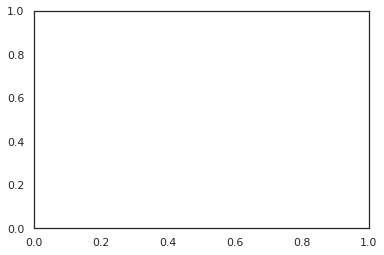

In [56]:
viajes_persona['HoraIni'].plot(kind = "hist");

~~¿Qué? Ese gráfico no tiene sentido.~~ Al parecer el método `plot` de `pandas` no está preparado para datos temporales. 

Probaremos un método de `seaborn` llamado `distplot` que grafica histogramas **y** densidades (`kde`) al mismo tiempo. Quizás nos va mejor:

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

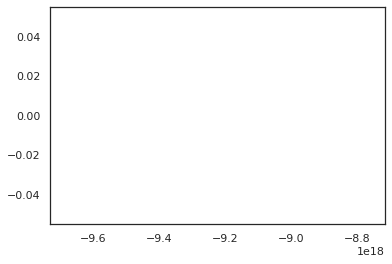

In [57]:
sns.distplot(viajes_persona['HoraIni'])

¡Tampoco funcionó! Nos dio un error difícil de comprender, pero al menos nos dió un error. Dice:

> `TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''`

Esto significa que hay valores en la columna que son de tipo punto flotante (números decimales, `float64`), cuando la columna debe ser de tipo temporal (`<m8[ns]`). ¿Cómo es posible?

¡La respuesta es que había elementos nulos en la tabla de viajes! Podemos ver la tabla original, que no hemos cruzado, aquí:

In [58]:
viajes[pd.isnull(viajes['HoraIni'])]['HoraIni']

Viaje
1035310402    NaN
1037510402    NaN
1043710302    NaN
1109910102    NaN
1109910202    NaN
             ... 
2553210118    NaN
2588310102    NaN
2613610102    NaN
2765310102    NaN
2768210202    NaN
Name: HoraIni, Length: 136, dtype: object

Reemplacemos nuestra tabla por una sin valores nulos en ese campo:

In [59]:
viajes_persona = viajes_persona[pd.notnull(viajes_persona['HoraIni'])]

Intentemos graficar ahora:

In [60]:
viajes_persona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101630 entries, 0 to 113590
Data columns (total 72 columns):
Hogar_x                      101630 non-null int64
Persona                      101630 non-null int64
Etapas                       101630 non-null int64
ComunaOrigen                 101630 non-null object
ComunaDestino                101630 non-null object
SectorOrigen                 101630 non-null object
SectorDestino                101630 non-null object
ZonaOrigen                   101630 non-null int64
ZonaDestino                  101630 non-null int64
OrigenCoordX                 83439 non-null float64
OrigenCoordY                 83439 non-null float64
DestinoCoordX                83439 non-null float64
DestinoCoordY                83439 non-null float64
Proposito                    101629 non-null object
PropositoAgregado            101630 non-null float64
ActividadDestino             17460 non-null object
MediosUsados                 101630 non-null object
ModoAgrega

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

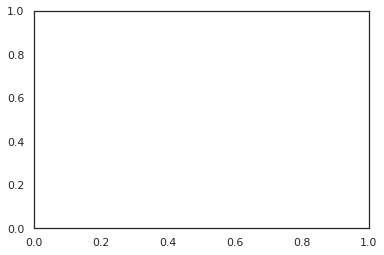

In [61]:
viajes_persona['HoraIni'].plot(kind='hist')

Sigue siendo extraño el resultado.

La respuesta es que los métodos que grafican datos en general no suelen estar preparados para variables temporales. Pero `pandas` nos permite facilitar ese trabajo ayudándonos a convertir esos valores en datos numéricos utilizando la división por `pd.Timedelta`.

Por ejemplo, si tenemos un valor que dice `23:30` y lo dividimos por `pd.Timedelta(hours=1)`, obtendremos como resultado `23.5`. Probemos:

In [62]:
viajes_persona['HoraDeInicio'] = viajes_persona['HoraIni'] / pd.Timedelta(hours=1)

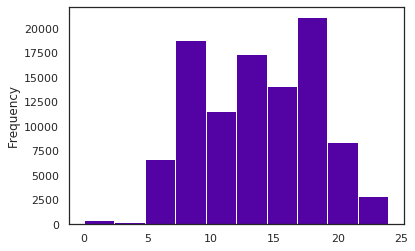

In [63]:
viajes_persona['HoraDeInicio'].plot(kind='hist');

¡Funciona! Aunque seguimos con el mismo problema de determinar el tamaño de los bins, o bien de utilizar una KDE.

En `seaborn` existe el método `distplot` que permite hacer ambos gráficos al mismo tiempo, además, utilizando una regla para calcular el tamaño de los bins. Se ve así:

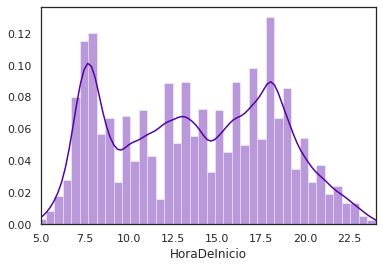

In [64]:
sns.distplot(viajes_persona['HoraDeInicio'])
# como vemos que la mayoría de los viajes es entre 5 y 24 horas
# aprovechemos mejor el espacio configurando esos límites en el gráfico
plt.xlim([5,24]);

¡Funciona! Personalmente, me gusta este estilo de gráfico, ya que muestra tanto singularidades de los datos como una distribución continua. Las distribuciones se pueden comparar entre sí, y eso permite hacer cálculos analíticos. 

Por otro lado, se dificulta la interpretación, puesto que el eje Y contiene _densidades_, no _cantidades_. Entonces, dependiendo de lo que queramos observar, también dependerá el tipo de gráfico a utilizar. 

### Desagregando Datos

Ahora bien, el gráfico anterior muestra la distribución de hora de viaje para **todos** los viajes registrados. ¿Qué pasa si queremos desagregarlos por alguna variable de interés? 

Una manera de hacerlo sería generando un gráfico aparte para cada valor de esa variable extra.

Por ejemplo, vimos que los viajes tienen un `Proposito`, que incluía volver a casa, ir al trabajo, recreación, entre otros. Podemos esperar que las distribuciones de esos propósitos sean diferentes. 

En el siguiente ejemplo utilizaremos una grilla de gráficos utilizando la clase [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) de `seaborn`para mostrar las distintas desagregaciones que hagamos. Esta clase crea una grilla donde cada gráfico representará una combinación de las variables que hayamos elegido, y luego le aplica el mismo método de graficación a cada una. Así:

In [65]:
viajes_persona['Proposito']

0             volver a casa
1         Visitar a alguien
2                Al trabajo
3             volver a casa
4                Al trabajo
                ...        
113586        volver a casa
113587           De compras
113588        volver a casa
113589           Al trabajo
113590        volver a casa
Name: Proposito, Length: 101630, dtype: object

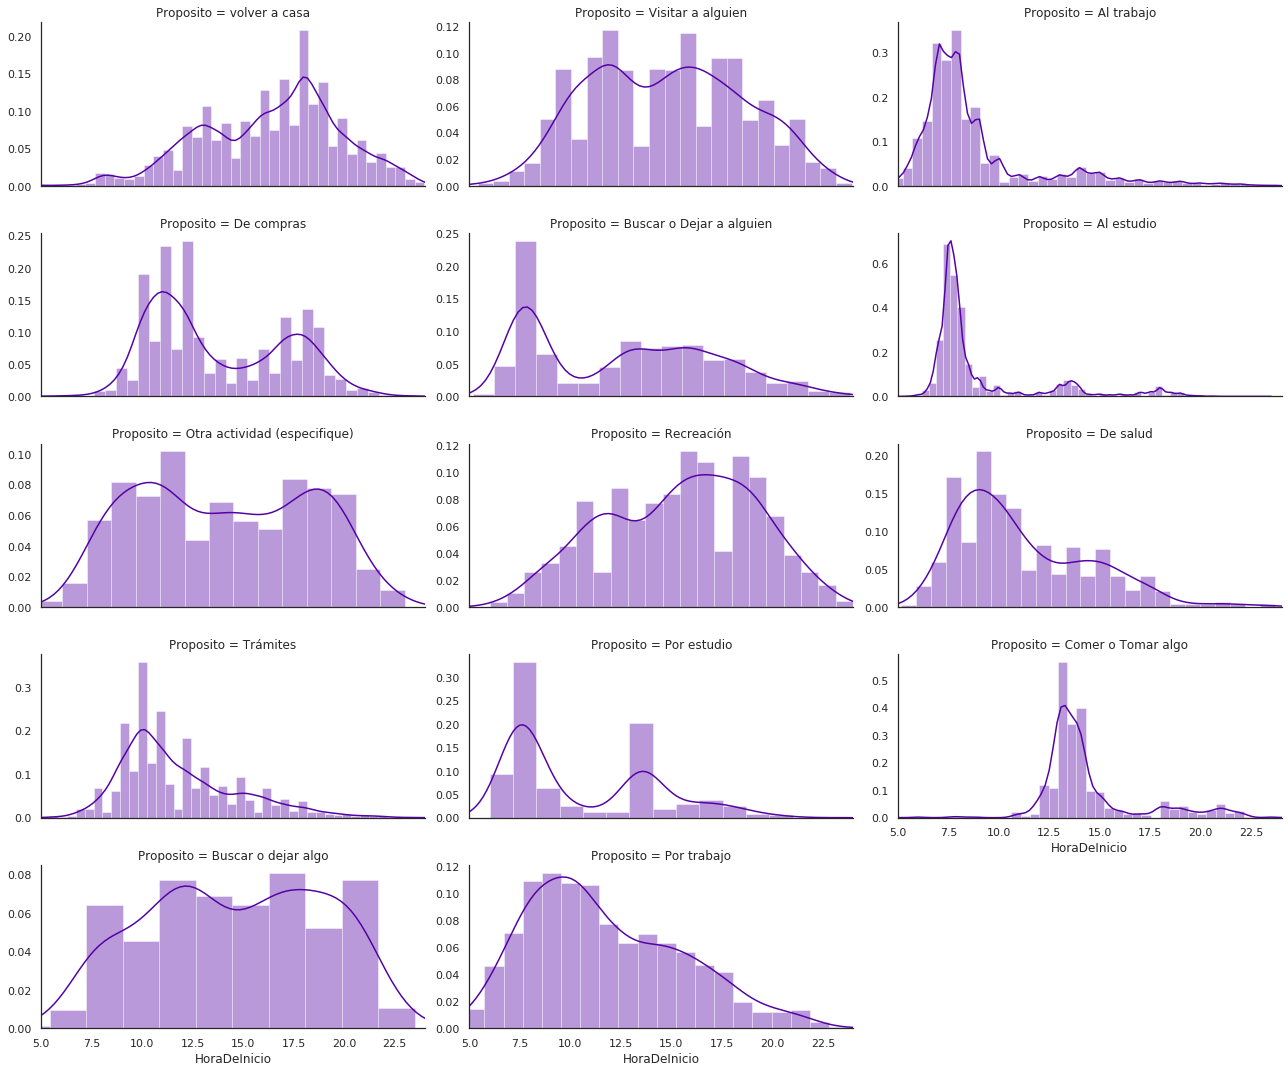

In [66]:
g = sns.FacetGrid(data=viajes_persona, col='Proposito', col_wrap=3, aspect=2, sharey=False)
g.map(sns.distplot, 'HoraDeInicio')
g.set(xlim=[5,24]);

¡Qué bien! Podemos encontrar muchas historias para contar y análisis para realizar sobre estos gráficos.

Por ejemplo, **¿son las rutinas de viaje diferentes para hombres y mujeres?**

In [67]:
personas.shape, viajes.shape

((60054, 38), (113591, 34))

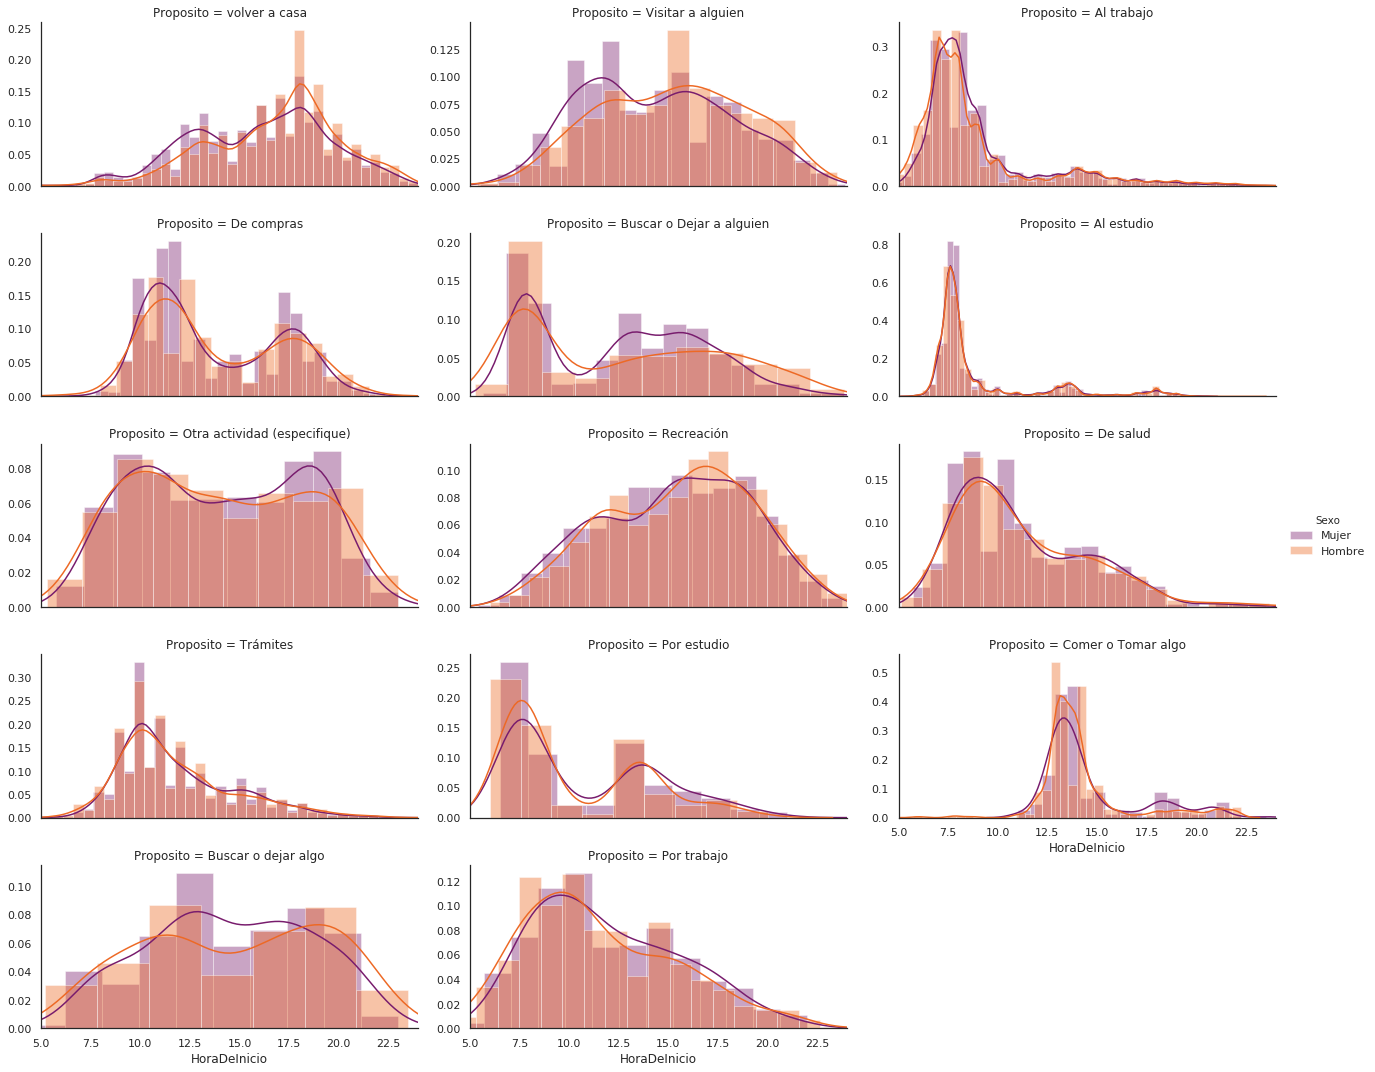

In [68]:
g = sns.FacetGrid(data=viajes_persona, col='Proposito', col_wrap=3, aspect=2, 
                  sharey=False, hue='Sexo', palette='inferno')
g.map(sns.distplot, 'HoraDeInicio')
g.set(xlim=[5,24])
g.add_legend();

¡Aparecen muchos resultados interesantes!

Sin embargo, la presencia de dos histogramas simultáneos en cada gráfico interfiere con nuestra visualización. Podemos desactivarlos con el parámetro `hist=False` de `sns.distplot`:

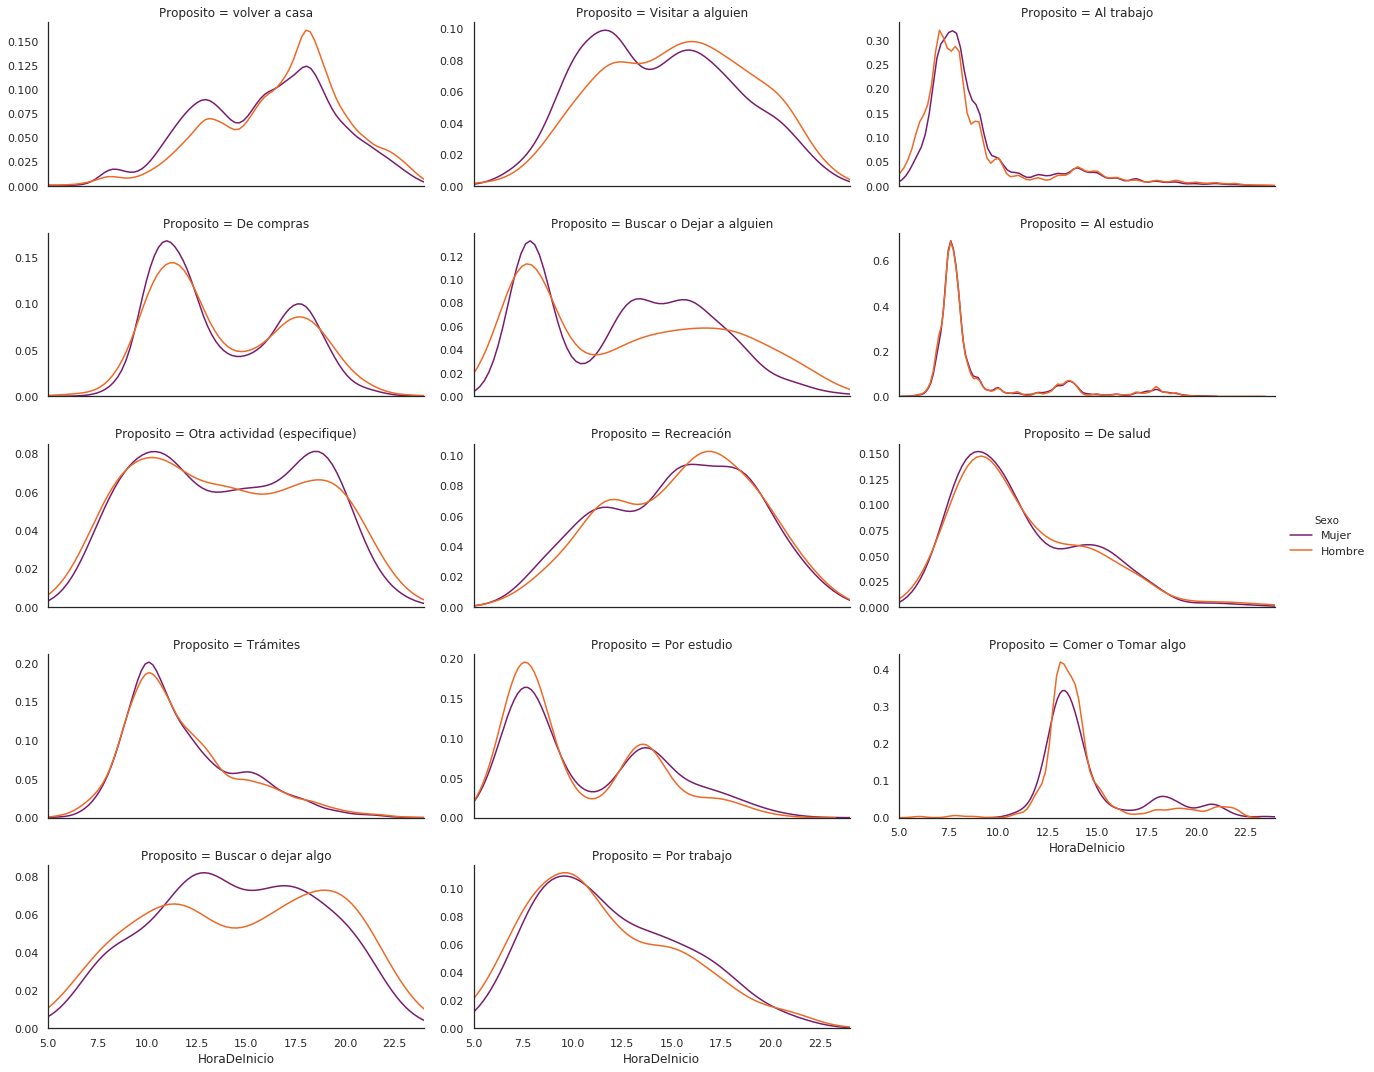

In [69]:
g = sns.FacetGrid(data=viajes_persona, col='Proposito', col_wrap=3, aspect=2, 
                  sharey=False, hue='Sexo', palette='inferno')
g.map(sns.distplot, 'HoraDeInicio', hist=False)
g.set(xlim=[5,24])
g.add_legend();

Oh, aquí hay muchas diferencias interesantes. Les invito a encontrar historias para contar en este gráfico :)

---
  
## Conclusiones

Como pueden ver, con `pandas` y `seaborn` podemos explorar las relaciones que hay entre las variables de nuestro data set. La dificultad no está en _implementar_ las visualizaciones, sino en:

  - Primero, saber qué preguntarle a los datos.
  - Segundo, saber cómo expresar esa pregunta a través de métodos de `pandas` y `seaborn`.

#### Siguientes Pasos

Respecto a análisis de datos, algunas posibles operaciones son:

  * Buscar correlaciones entre variables utilizando `plot(x=..., y=..., kind='scatter')`.
  * Cruzar los datos de las personas y viajes con datos de residencia (el archivo `hogares.csv`).
  * Utilizar la georeferencia de los viajes y visualizarlos en un mapa.

**Importante**: Este análisis es exploratorio y busca mostrar un flujo de análisis inicial en datos públicos. Sin embargo, no es un análisis verdaderamente formal, puesto que está omitiendo pasos y variables que son relevantes, como los **factores de expansión** (las columnas `Factor*` que hay en cada tabla). Estas variables indican el peso de cada viaje, persona y hogar dentro del data set -- ¡algunas observaciones son más representativas que otras! Sin considerar esos factores nuestros resultados no son válidos. Ahora bien, ese análisis queda para una clase futura.
